# Box plot
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plot
- https://stackoverflow.com/questions/68475034/how-to-plot-a-seaborn-boxplot-for-each-month-and-year
- https://stackoverflow.com/questions/52097045/plot-a-seaborn-boxplot-with-month-as-x-axes-with-a-daily-dataset
- https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Use Pandas to import the data from "fcc-forum-pageviews.csv".
- Set the index to the date column & clean <= 2.5% and >= 97.5 %.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

df = df.loc[(df['value'] > df['value'].quantile(0.025)) &
            (df['value'] < df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create a draw_box_plot function that draws a bar chart:
- similar to "examples/Figure_3.png"
- These box plots should show how the values are distributed within a given year or month and how it compares over time. 
- The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
- Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
- The boilerplate includes commands to prepare the data.

In [3]:
#%%timeit
dfb = df.copy()
dfb.reset_index(inplace=True)
dfb['year'] = dfb['date'].dt.year
#dfb['month'] = dfb.date.dt.month
dfb['month'] = dfb.date.dt.strftime('%b')
# print(dfb.info())
dfb

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [4]:
#%%timeit
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head(15)


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun
7,2016-06-09,18139,2016,Jun
8,2016-06-14,19395,2016,Jun
9,2016-06-15,18584,2016,Jun


Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

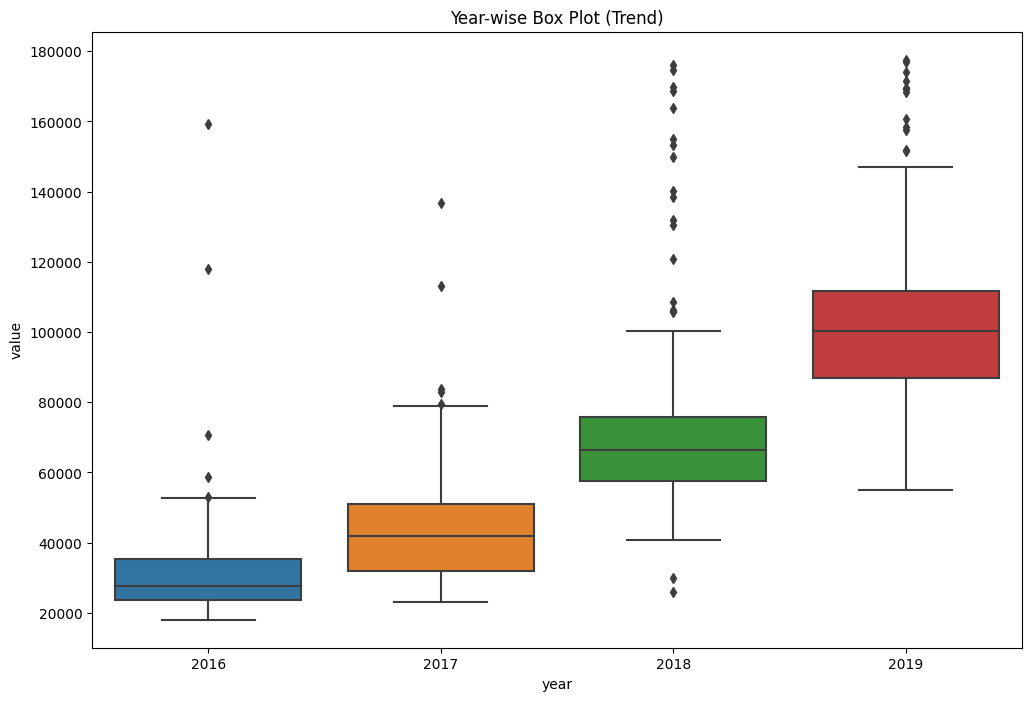

In [5]:
# Draw box plots (using Seaborn) - Year
fig, ax = plt.subplots(figsize=(12, 8))

#sns.boxplot(x=df_box.year, y=df_box.value, hue=df_box.month, ax=ax)
sns.boxplot(x=df_box.year, y=df_box.value, ax=ax)
ax.set_title('Year-wise Box Plot (Trend)')
# ax.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
# ax.set(xlabel='Year')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

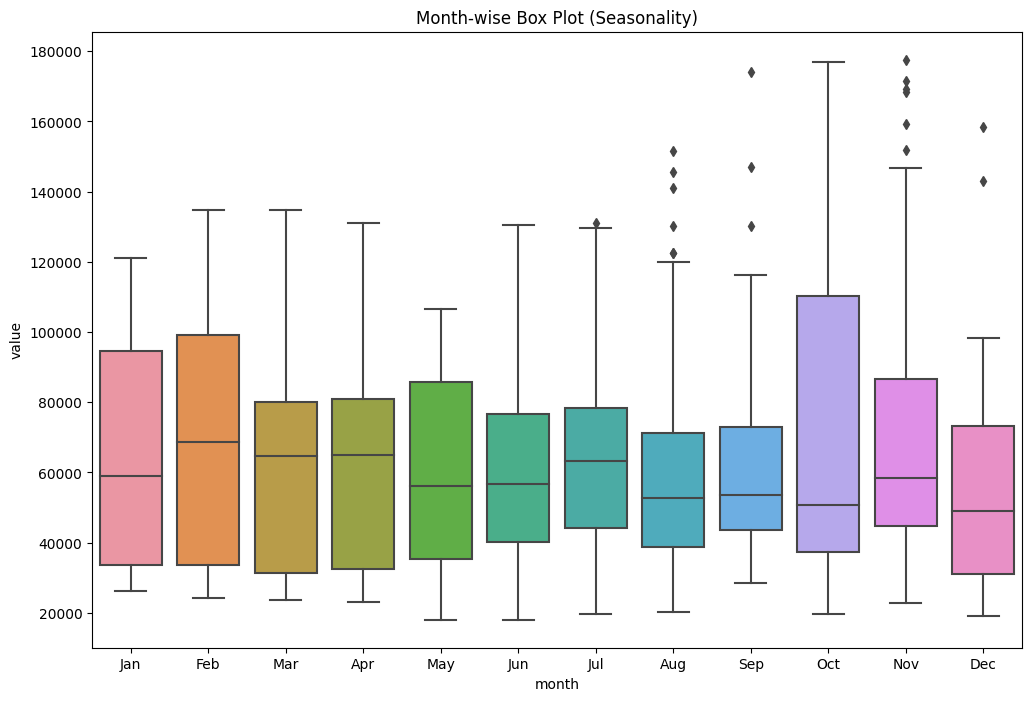

In [6]:
# Draw box plots (using Seaborn) - Month
fig, axe = plt.subplots(figsize=(12, 8))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x=df_box.month, y=df_box.value, ax=axe, order=months)
#axe.set(xlabel='Month', xticklabels=months)  ## NOP-- only xtickslabeks correct si order
axe.set_title('Month-wise Box Plot (Seasonality)')


### OK - Ready to make the full boxplot for the excersie
> Rememnber: df_box just created for them...

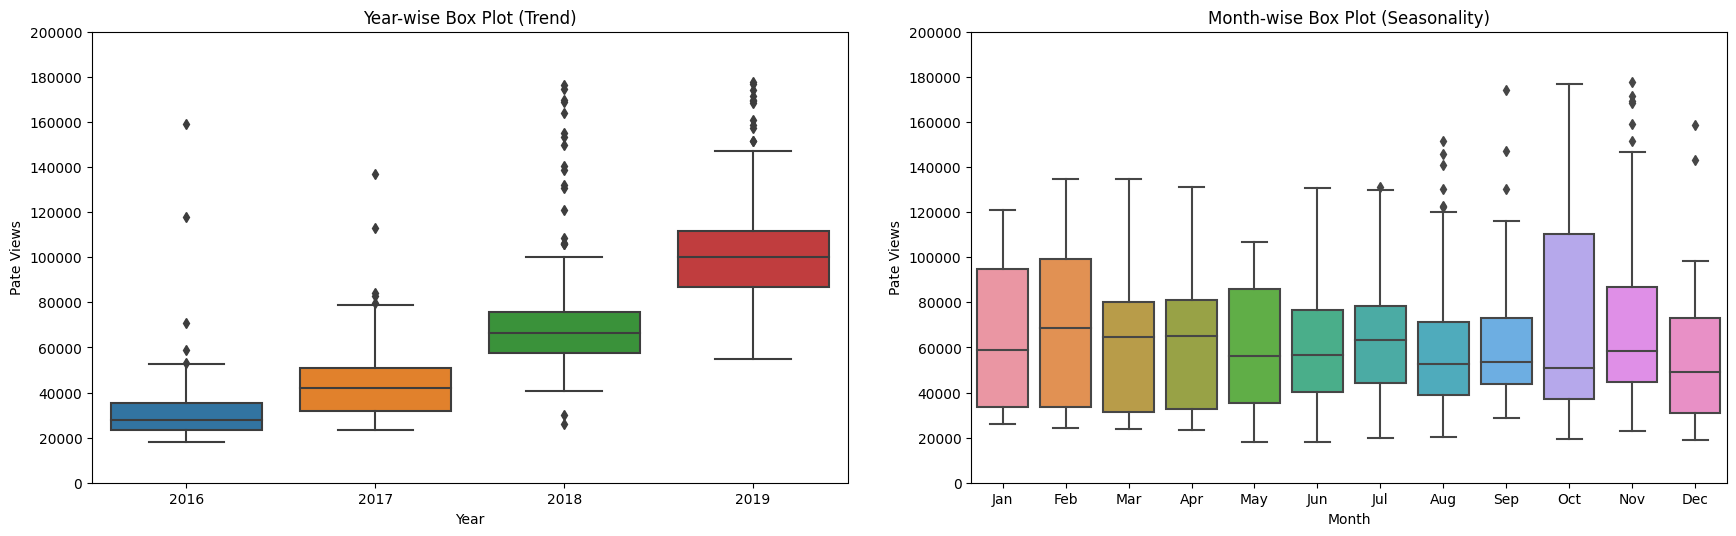

In [40]:
# # Draw box plots (using Seaborn)

#fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=150, layout='constrained')    
fig, axes = plt.subplots(1, 2, figsize=(18, 6))     # 1 row, 2 charts in this row
ylabel = 'Pate Views'
yticks = [i * 20_000 for i in range(11)]

# 1st chart: distributed values within a given year. Tit: Year-wise Box Plot (Trend)
sns.boxplot(x=df_box.year, y=df_box.value, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel(ylabel)
axes[0].set_xlabel('Year')
axes[0].set_yticks(yticks)


# 2nd chart: distributed values within a given month. Tit: Month-wise Box Plot (Seasonality)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x=df_box.month, y=df_box.value, ax=axes[1], order=months)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel(ylabel)
axes[1].set_xlabel('Month')
# axes[1].set_ylim(ylim)
axes[1].set_yticks(yticks)
# axes[1].set(ylim=ylim, yticks=yticks)


fig.tight_layout(pad=3)




In [24]:
fig.get_dpi

<bound method Figure.get_dpi of <Figure size 10800x3600 with 2 Axes>>

In [9]:
print(type(fig), type(axes[0]), type(axes[1]))

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'>


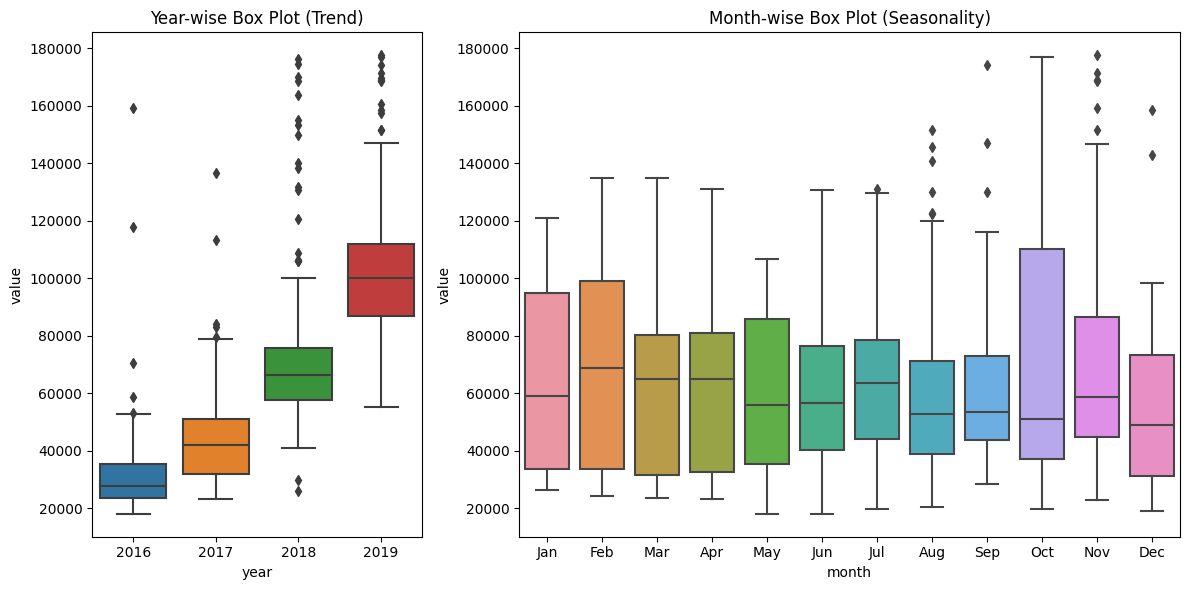

In [10]:
## https://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots

fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

sns.boxplot(x=df_box.year, y=df_box.value, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x=df_box.month, y=df_box.value, ax=axes[1], order=months)
axes[1].set_title('Month-wise Box Plot (Seasonality)')

fig.tight_layout()